In [1]:
%matplotlib inline
import numpy as np
import polars as pl
import pymc as pm
import arviz as az
import altair as alt
import hvplot.polars
from arviz import waic
import matplotlib.pyplot as plt
from pybaseball import batting_stats
import seaborn as sns; sns.set_context('notebook')
import warnings
import IPython
warnings.filterwarnings("ignore", module="mkl_fft")
warnings.filterwarnings("ignore", module="matplotlib")
RANDOM_SEED = 20090425

In [46]:
battingstats = pl.DataFrame(batting_stats(2016,2023)).filter(pl.col("Team") != "- - -")

In [47]:
jav = battingstats.filter(pl.col("Name") == 'Aaron Judge')
jav.hvplot.scatter(x = 'Season', y = 'OBP')

battingstats.filter(pl.col("Name") == 'Aaron Judge')

shape: (3, 320)
┌───────┬────────┬─────────────┬──────┬───┬──────┬──────┬───────┬───────┐
│ IDfg  ┆ Season ┆ Name        ┆ Team ┆ … ┆ xBA  ┆ xSLG ┆ xwOBA ┆ L-WAR │
│ ---   ┆ ---    ┆ ---         ┆ ---  ┆   ┆ ---  ┆ ---  ┆ ---   ┆ ---   │
│ i64   ┆ i64    ┆ str         ┆ str  ┆   ┆ f64  ┆ f64  ┆ f64   ┆ f64   │
╞═══════╪════════╪═════════════╪══════╪═══╪══════╪══════╪═══════╪═══════╡
│ 15640 ┆ 2022   ┆ Aaron Judge ┆ NYY  ┆ … ┆ null ┆ null ┆ null  ┆ 11.4  │
│ 15640 ┆ 2017   ┆ Aaron Judge ┆ NYY  ┆ … ┆ null ┆ null ┆ null  ┆ 8.7   │
│ 15640 ┆ 2021   ┆ Aaron Judge ┆ NYY  ┆ … ┆ null ┆ null ┆ null  ┆ 5.6   │
└───────┴────────┴─────────────┴──────┴───┴──────┴──────┴───────┴───────┘

In [38]:
import plotly.express as px
fig = px.histogram(battingstats, x="OBP",nbins=30, marginal="rug",hover_data=battingstats['Name','Season','PA','HR','R','RBI','SB','OBP'].columns)
fig.show()

In [6]:
battingstats["OBP"].hvplot.hist()

:Histogram   [OBP]   (Count)

In [7]:
#battingstats.group_by("Name", maintain_order=True).n_unique()
#battingstats.with_columns(n = pl.lit(1)).select('Name','n',).group_by("Name").sum().sort('n',descending = True).group_by("n").count()
battingstats.with_columns(seasons_played = pl.lit(1)).select('IDfg','seasons_played',).group_by("IDfg").sum().join(battingstats,'IDfg').sort('Age Rng').hvplot.box('OBP',by = 'Age Rng')#'seasons_played')

:BoxWhisker   [Age Rng]   (OBP)

In [8]:
bat = battingstats.with_columns(seasons_played = pl.lit(1)).select('IDfg','seasons_played',).group_by("IDfg").sum().join(battingstats,'IDfg').drop(['FRM', 'xBA', 'xSLG', 'xwOBA', 'wOBA',  'wRAA',  'wRC',  'Bat',  'Fld',  'Rep',  'Pos',  'RAR',  'WAR',  'Dol',  'Spd',  'wRC+',  'WPA',  '-WPA',  '+WPA',  'RE24',  'REW',  'pLI',  'phLI',  'PH',  'WPA/LI',  'Clutch',  'FB% (Pitch)',  'FBv',  'SL%',  'SLv',  'CT%',  'CTv',  'CB%',  'CBv',  'CH%',  'CHv',  'SF%',  'SFv',  'KN%',  'KNv',  'XX%',  'PO%',  'wFB',  'wSL',  'wCT',  'wCB',  'wCH',  'wSF',  'wKN',  'wFB/C',  'wSL/C',  'wCT/C',  'wCB/C',  'wCH/C',  'wSF/C',  'wKN/C',  'O-Swing%',  'Z-Swing%',  'Swing%',  'O-Contact%',  'Z-Contact%',  'Contact%',  'Zone%',  'F-Strike%',  'SwStr%',  'BsR',  'FA% (sc)',  'FT% (sc)',  'FC% (sc)',  'FS% (sc)',  'FO% (sc)',  'SI% (sc)',  'SL% (sc)',  'CU% (sc)',  'KC% (sc)',  'EP% (sc)',  'CH% (sc)',  'SC% (sc)',  'KN% (sc)',  'UN% (sc)',  'vFA (sc)',  'vFT (sc)',  'vFC (sc)',  'vFS (sc)',  'vFO (sc)',  'vSI (sc)',  'vSL (sc)',  'vCU (sc)',  'vKC (sc)',  'vEP (sc)',  'vCH (sc)',  'vSC (sc)',  'vKN (sc)',  'FA-X (sc)',  'FT-X (sc)',  'FC-X (sc)',  'FS-X (sc)',  'FO-X (sc)',  'SI-X (sc)',  'SL-X (sc)',  'CU-X (sc)',  'KC-X (sc)',  'EP-X (sc)',  'CH-X (sc)',  'SC-X (sc)',  'KN-X (sc)',  'FA-Z (sc)',  'FT-Z (sc)',  'FC-Z (sc)',  'FS-Z (sc)',  'FO-Z (sc)',  'SI-Z (sc)',  'SL-Z (sc)',  'CU-Z (sc)',  'KC-Z (sc)',  'EP-Z (sc)',  'CH-Z (sc)',  'SC-Z (sc)',  'KN-Z (sc)',  'wFA (sc)',  'wFT (sc)',  'wFC (sc)',  'wFS (sc)',  'wFO (sc)',  'wSI (sc)',  'wSL (sc)',  'wCU (sc)',  'wKC (sc)',  'wEP (sc)',  'wCH (sc)',  'wSC (sc)',  'wKN (sc)',  'wFA/C (sc)',  'wFT/C (sc)',  'wFC/C (sc)',  'wFS/C (sc)',  'wFO/C (sc)',  'wSI/C (sc)',  'wSL/C (sc)',  'wCU/C (sc)',  'wKC/C (sc)',  'wEP/C (sc)',  'wCH/C (sc)',  'wSC/C (sc)',  'wKN/C (sc)',  'O-Swing% (sc)',  'Z-Swing% (sc)',  'Swing% (sc)',  'O-Contact% (sc)',  'Z-Contact% (sc)',  'Contact% (sc)',  'Zone% (sc)','CH% (pi)',  'CS% (pi)',  'CU% (pi)',  'FA% (pi)',  'FC% (pi)',  'FS% (pi)',  'KN% (pi)',  'SB% (pi)',  'SI% (pi)',  'SL% (pi)',  'XX% (pi)',  'vCH (pi)',  'vCS (pi)',  'vCU (pi)',  'vFA (pi)',  'vFC (pi)',  'vFS (pi)',  'vKN (pi)',  'vSB (pi)',  'vSI (pi)',  'vSL (pi)',  'vXX (pi)',  'CH-X (pi)',  'CS-X (pi)',  'CU-X (pi)',  'FA-X (pi)',  'FC-X (pi)',  'FS-X (pi)',  'KN-X (pi)',  'SB-X (pi)',  'SI-X (pi)',  'SL-X (pi)',  'XX-X (pi)',  'CH-Z (pi)',  'CS-Z (pi)',  'CU-Z (pi)',  'FA-Z (pi)',  'FC-Z (pi)',  'FS-Z (pi)',  'KN-Z (pi)',  'SB-Z (pi)',  'SI-Z (pi)',  'SL-Z (pi)',  'XX-Z (pi)',  'wCH (pi)',  'wCS (pi)',  'wCU (pi)',  'wFA (pi)',  'wFC (pi)',  'wFS (pi)',  'wKN (pi)',  'wSB (pi)',  'wSI (pi)',  'wSL (pi)',  'wXX (pi)',  'wCH/C (pi)',  'wCS/C (pi)',  'wCU/C (pi)',  'wFA/C (pi)',  'wFC/C (pi)',  'wFS/C (pi)',  'wKN/C (pi)',  'wSB/C (pi)',  'wSI/C (pi)',  'wSL/C (pi)',  'wXX/C (pi)',  'O-Swing% (pi)',  'Z-Swing% (pi)',  'Swing% (pi)',  'O-Contact% (pi)',  'Z-Contact% (pi)',  'Contact% (pi)',  'Zone% (pi)',  'Pace (pi)'])

In [9]:
columns_with_nulls = [col for col in bat.columns if bat[col].is_null().any()]

In [10]:
bat2 = bat.with_columns( Name_seas =
  pl.when(pl.col("seasons_played") == 1)
    .then(pl.lit("One Season"))
    .when(pl.col("seasons_played") == 2)
    .then(pl.lit("Two Seasons"))
    .otherwise("Name")
).join(#.with_columns(seasons_played2 = pl.lit(1)).select("IDfg",'Name_seas','seasons_played2',).group_by('Name_seas').sum()
    battingstats,'IDfg')
bat2.hvplot.density('OBP', by = 'Name_seas')

:NdOverlay   [Name_seas]
   :Distribution   [OBP]   (Density)

In [25]:
import polars.selectors as cs
#(['IDfg','Season','Name', 'Team', 'Age',])
#bat.select(~cs.by_dtype(pl.Utf8)).corr()
mask=np.triu(np.ones_like(bat.select(~cs.by_dtype(pl.Utf8)).corr(),dtype=bool))
plt.figure(figsize=(100, 100))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(bat.select(~cs.by_dtype(pl.Utf8)).corr(), vmin=-1, vmax=1, annot=True, 
                    xticklabels=bat.select(~cs.by_dtype(pl.Utf8)).columns, yticklabels=bat.select(~cs.by_dtype(pl.Utf8)).columns,
                    mask = mask)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

plt.show()

In [26]:
bat.select(~cs.by_dtype(pl.Utf8))

shape: (1_032, 92)
┌───────┬────────────────┬────────┬─────┬───┬────────┬───────┬───────┬───────┐
│ IDfg  ┆ seasons_played ┆ Season ┆ Age ┆ … ┆ Events ┆ CStr% ┆ CSW%  ┆ L-WAR │
│ ---   ┆ ---            ┆ ---    ┆ --- ┆   ┆ ---    ┆ ---   ┆ ---   ┆ ---   │
│ i64   ┆ i32            ┆ i64    ┆ i64 ┆   ┆ i64    ┆ f64   ┆ f64   ┆ f64   │
╞═══════╪════════════════╪════════╪═════╪═══╪════════╪═══════╪═══════╪═══════╡
│ 15640 ┆ 3              ┆ 2022   ┆ 30  ┆ … ┆ 404    ┆ 0.169 ┆ 0.287 ┆ 11.4  │
│ 13611 ┆ 8              ┆ 2018   ┆ 25  ┆ … ┆ 434    ┆ 0.22  ┆ 0.27  ┆ 10.4  │
│ 10155 ┆ 5              ┆ 2018   ┆ 26  ┆ … ┆ 352    ┆ 0.201 ┆ 0.261 ┆ 9.5   │
│ 18401 ┆ 4              ┆ 2023   ┆ 25  ┆ … ┆ 562    ┆ 0.137 ┆ 0.214 ┆ 8.5   │
│ 15640 ┆ 3              ┆ 2017   ┆ 25  ┆ … ┆ 338    ┆ 0.157 ┆ 0.29  ┆ 8.7   │
│ …     ┆ …              ┆ …      ┆ …   ┆ … ┆ …      ┆ …     ┆ …     ┆ …     │
│ 589   ┆ 1              ┆ 2017   ┆ 40  ┆ … ┆ 371    ┆ 0.172 ┆ 0.262 ┆ -1.2  │
│ 393   ┆ 2              ┆ 2018   ┆ 39  ┆ … ┆ 425    ┆ 0.148 ┆ 0.212 ┆ -1.7  │
│ 6876  ┆ 2              ┆ 2017   ┆ 31  ┆ … ┆ 411    ┆ 0.154 ┆ 0.291 ┆ -1.8  │
│ 1177  ┆ 3              ┆ 2017   ┆ 37  ┆ … ┆ 504    ┆ 0.18  ┆ 0.268 ┆ -1.9  │
│ 9272  ┆ 3              ┆ 2018   ┆ 32  ┆ … ┆ 282    ┆ 0.174 ┆ 0.316 ┆ -2.6  │
└───────┴────────────────┴────────┴─────┴───┴────────┴───────┴───────┴───────┘

In [27]:
battingstats['IDfg'].n_unique()

381

In [28]:
hitters_name = bat2.with_columns(pl.col("Name_seas").str.strip_chars().cast(pl.Categorical))
player = hitters_name['Name_seas'].to_physical().to_numpy()
player_str = hitters_name['Name_seas'].cat.get_categories()

team_name = bat2.with_columns(pl.col("Team").str.strip_chars().cast(pl.Categorical))
team = team_name['Team'].to_physical().to_numpy()
team_str = team_name['Team'].cat.get_categories()

PA = bat2['PA'].to_numpy()
EV = bat2['EV'].to_numpy()
LA = bat2['LA'].to_numpy()
BABIP = bat2['BABIP'].to_numpy()
#OBP = train['OBP'].replace(0,1e-5).replace(1,.999999).to_numpy()
OBP = bat2['OBP'].to_numpy()
OBP_mean = OBP.mean()
OBP_sd = OBP.std()
OBP_center_scaled = (OBP - OBP_mean) / OBP_sd
coords = {"Name_seas":player_str}
coords_team = {"Team" : team_str}

In [29]:
with pm.Model(coords=coords) as varying_intercept_noncentered_Name_seas:
    # Priors
    mu_a = pm.Normal('mu_a', mu = 0., sigma = 10)
    sigma_a = pm.HalfCauchy('sigma_a', 1e5)
    
    #v_prior = pm.Gamma('v_prior',alpha = 1,beta = 30,dims='Name_seas')
    
    # EV model
    #gamma_0 = pm.Normal('gamma_0', mu=0., sigma=1e5)
    #gamma_1 = pm.Normal('gamma_1', mu=0., sigma=1e5)

    #EV model for intercept
    #mu_a = pm.Deterministic('mu_a', gamma_0 + gamma_1*EV_player_f)
    
    # player variation not explained by EV
    z_a = pm.Normal('z_a', mu=0, sigma=1, dims='Name_seas')
    mu = pm.Deterministic("mu", mu_a + z_a * sigma_a, dims='Name_seas')
    
    # common slopes
    beta = pm.Normal('beta', mu=0., sigma=5)

    #nu
    #v = pm.Exponential('v', scale = v_prior,dims='Name_seas')
    
    # Model error
    sigma_y = pm.HalfCauchy('sigma_y', 5)

    #a = pm.InverseGamma('a',alpha = 1,beta = 1)#lower=0, upper=100)
    #b = pm.InverseGamma('b',alpha = 1,beta = 1)#lower=0, upper=100)

    
    # Expected value
    y_hat = mu[player] + beta *  EV
    
    # Data likelihood
    y_like = pm.Normal('y_like', mu=y_hat, sigma=sigma_y, observed=OBP)
    #y_like = pm.StudentT('y_like',mu=y_hat, sigma=sigma_y, nu = 6,observed=OBP)




In [31]:
with varying_intercept_noncentered_Name_seas:
    varying_intercept_noncentered_Name_seas_trace = pm.sample(tune = 1000,target_accept = 0.9,random_seed=RANDOM_SEED,idata_kwargs={'log_likelihood':True},cores = 4)
    # Posterior predictive sampling
    idata = pm.sample_posterior_predictive(varying_intercept_noncentered_Name_seas_trace, extend_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_a, sigma_a, z_a, beta, sigma_y]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 103 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [y_like]


Output()

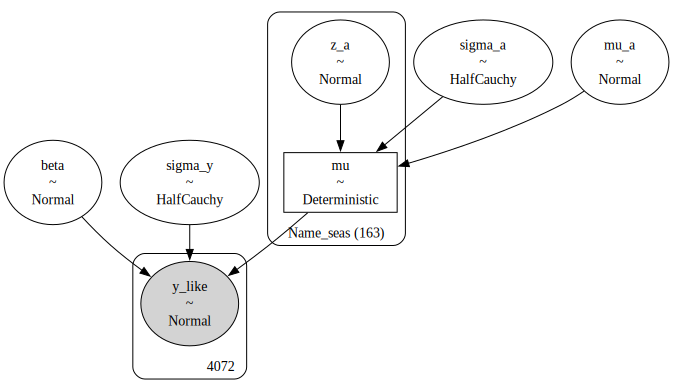

In [32]:
pm.model_to_graphviz(varying_intercept_noncentered_Name_seas)

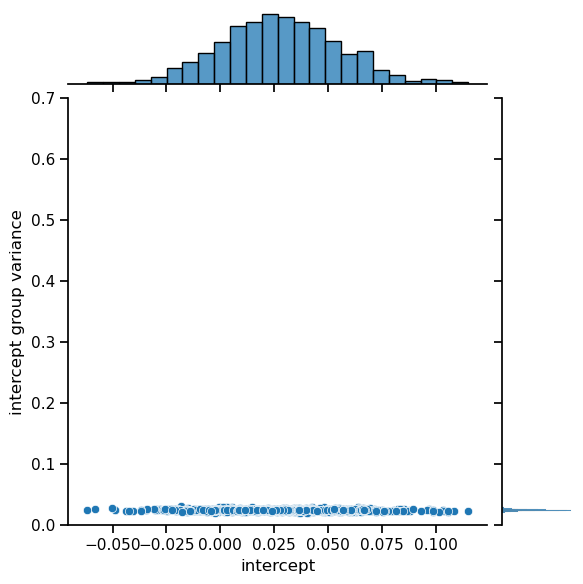

In [33]:
x = pl.Series('intercept', varying_intercept_noncentered_Name_seas_trace.posterior['mu'].sel(chain=0)[:,2].to_numpy())
y = pl.Series('intercept group variance', varying_intercept_noncentered_Name_seas_trace.posterior['sigma_a'].sel(chain=0).to_numpy())

sns.jointplot(x=x, y=y, ylim=(0, .7));
plt.show()

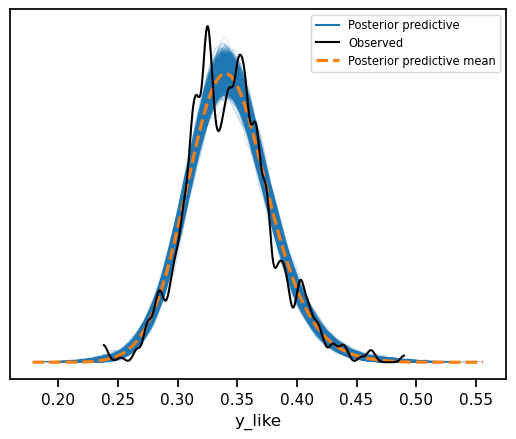

In [34]:
az.plot_ppc(varying_intercept_noncentered_Name_seas_trace,show = True);

In [ ]:
az.plot_ppc(varying_intercept_noncentered_Name_seas_trace, kind='cumulative',show = True);

In [ ]:
az.plot_trace(varying_intercept_noncentered_Name_seas_trace, var_names=['mu','sigma_y','beta','sigma_a','mu_a']);
plt.tight_layout();
plt.show()

In [ ]:
az.loo( varying_intercept_noncentered_Name_seas_trace)

In [ ]:
varying_intercept_noncentered_Name_seas_trace.sample_stats["tree_depth"].plot(col="chain", ls="none", marker=".", alpha=0.3);
plt.show()

In [ ]:
#az.plot_forest(varying_intercept_noncentered_Name_seas_trace, var_names=['mu'], figsize=(6,70), combined=True, ess=True, r_hat=True,show = True);

In [269]:
with pm.Model(coords=coords_team) as varying_intercept_noncentered_team:
    # Priors
    mu_a = pm.Normal('mu_a', mu = 0., sigma = 10)
    sigma_a = pm.HalfNormal('sigma_a', 10)
    
    #v_prior = pm.Gamma('v_prior',alpha = 1,beta = 30,dims='Name_seas')
    
     # EV model
    #gamma_0 = pm.Normal('gamma_0', mu=0., sigma=1e5)
    #gamma_1 = pm.Normal('gamma_1', mu=0., sigma=1e5)

    #EV model for intercept
    #mu_a = pm.Deterministic('mu_a', gamma_0 + gamma_1*EV_player_f)
    
    # player variation not explained by EV
    z_a = pm.Normal('z_a', mu=0, sigma=1, dims='Team')
    mu = pm.Deterministic("mu", mu_a + z_a * sigma_a, dims='Team')
    
    # common slopes
    beta = pm.Normal('beta', mu=0., sigma=5)

    #nu
    #v = pm.Exponential('v', scale = v_prior,dims='Name_seas')
    
    # Model error
    sigma_y = pm.HalfCauchy('sigma_y', 5)

    #a = pm.InverseGamma('a',alpha = 1,beta = 1)#lower=0, upper=100)
    #b = pm.InverseGamma('b',alpha = 1,beta = 1)#lower=0, upper=100)

    
    # Expected value
    y_hat = mu[team] + beta *  EV
    
    # Data likelihood
    y_like = pm.Normal('y_like', mu=y_hat, sigma=sigma_y, observed=OBP)
    #y_like = pm.StudentT('y_like',mu=y_hat, sigma=sigma_y, nu = 6,observed=OBP)



In [270]:
with varying_intercept_noncentered_team:
    varying_intercept_noncentered_trace_team = pm.sample(tune = 1000,target_accept = 0.9,random_seed=RANDOM_SEED,idata_kwargs={'log_likelihood':True},cores = 4)
    # Posterior predictive sampling
    idata = pm.sample_posterior_predictive(varying_intercept_noncentered_trace_team, extend_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_a, sigma_a, z_a, beta, sigma_y]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 87 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [y_like]


Output()

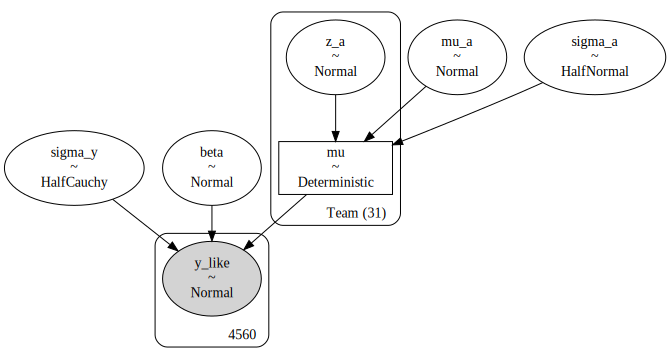

In [271]:
pm.model_to_graphviz(varying_intercept_noncentered_team)

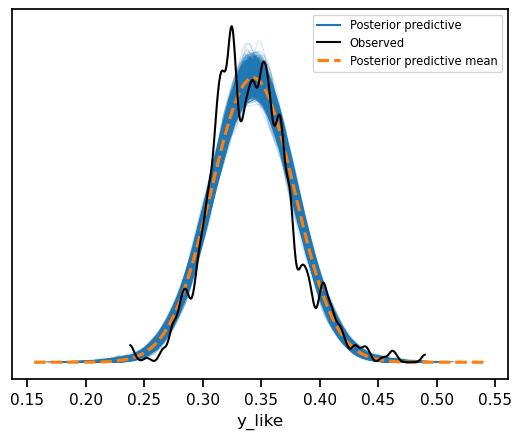

In [272]:
az.plot_ppc(varying_intercept_noncentered_trace_team,show = True);

/home/john/miniconda3/envs/BaseballHitters/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


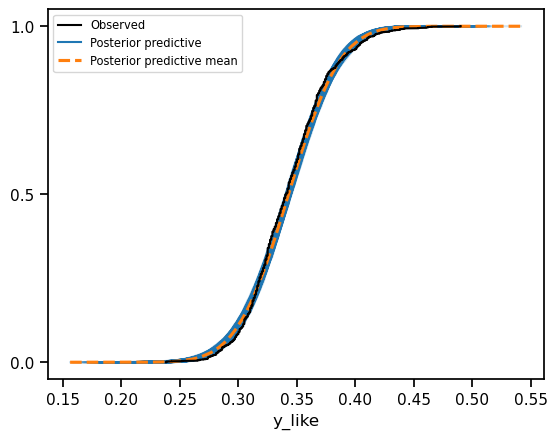

In [273]:
az.plot_ppc(varying_intercept_noncentered_trace_team, kind='cumulative',show = True);

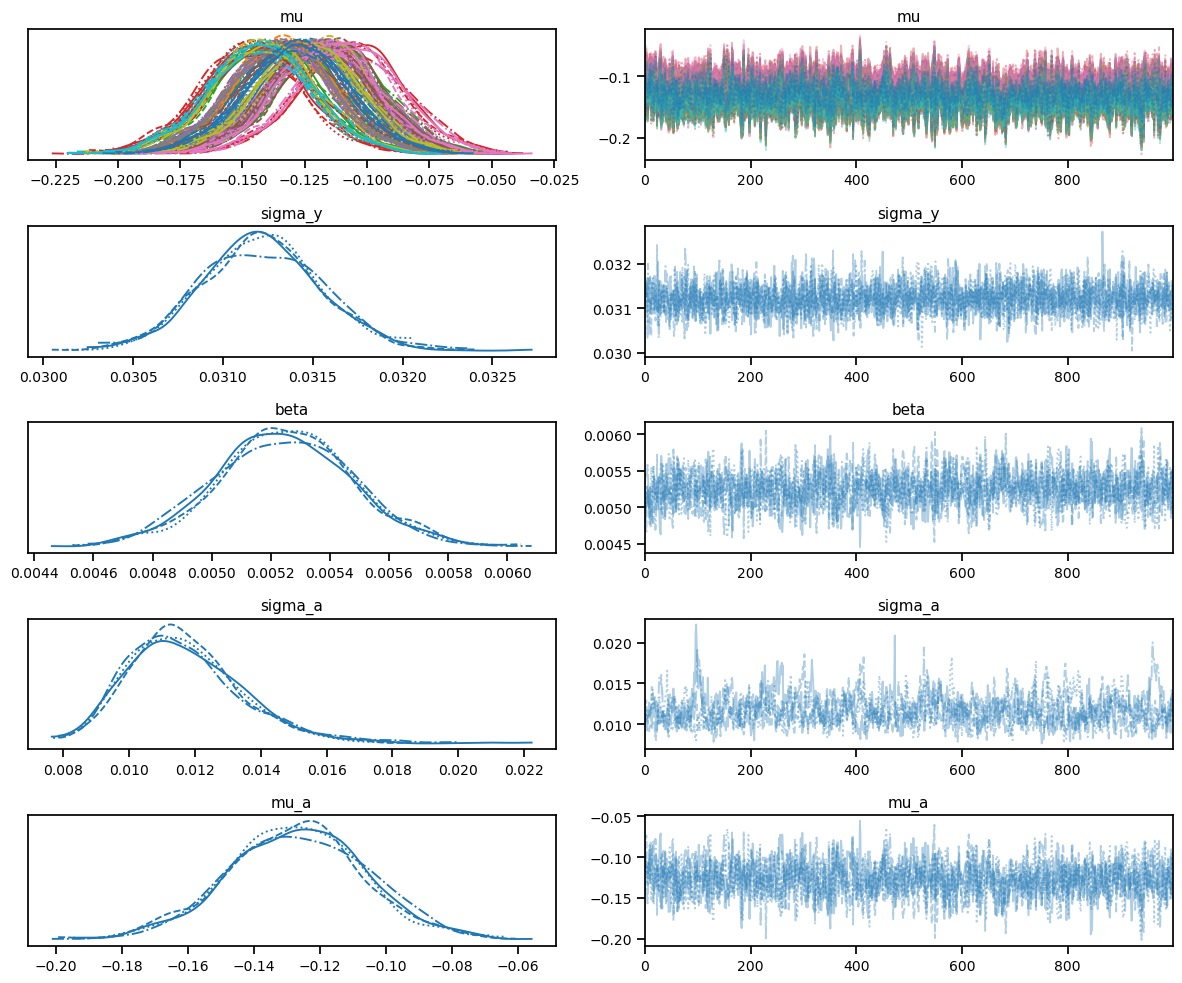

In [274]:
az.plot_trace(varying_intercept_noncentered_trace_team, var_names=['mu','sigma_y','beta','sigma_a','mu_a']);
plt.tight_layout();
plt.show()

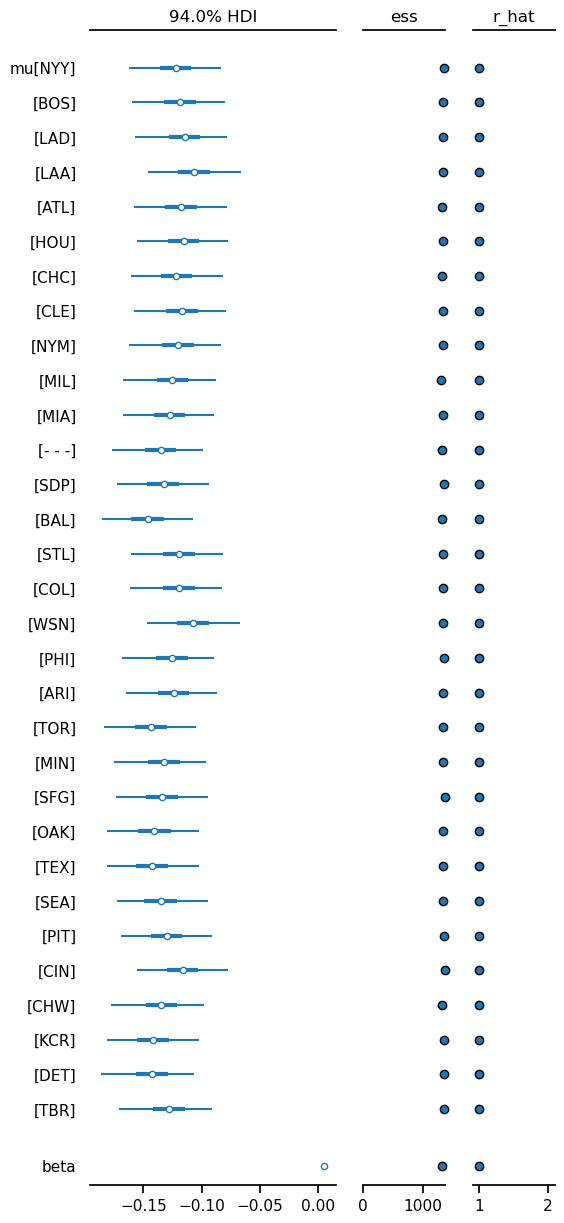

In [279]:
az.plot_forest(varying_intercept_noncentered_trace_team, var_names=['mu','beta'], figsize=(6,15), combined=True, ess=True, r_hat=True,show = True);

In [275]:
df_comp_loocv = az.compare({"Name_seas Model": varying_intercept_noncentered_trace_2, 'team Model': varying_intercept_noncentered_trace_team})
df_comp_loocv

rank      elpd_loo       p_loo    elpd_diff    weight  \
Name_seas Model     0  10452.297509  140.687595     0.000000  0.985819   
team Model          1   9322.062382   32.234400  1130.235127  0.014181   

                        se        dse  warning scale  
Name_seas Model  49.011131   0.000000    False   log  
team Model       51.894601  44.707547    False   log

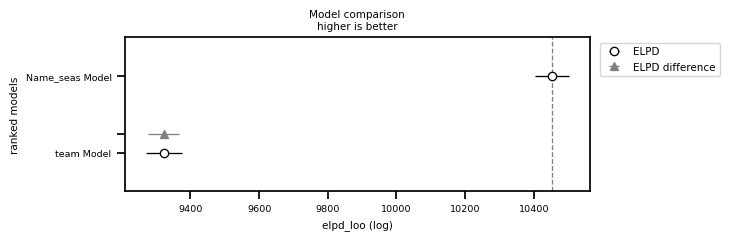

In [276]:
az.plot_compare(df_comp_loocv, insample_dev=False,show = True);

In [288]:
post =  varying_intercept_noncentered_trace_team.posterior
#print(post)
az.extract(post)

<xarray.Dataset> Size: 2MB
Dimensions:  (sample: 4000, Team: 31)
Coordinates:
  * Team     (Team) <U5 620B 'NYY' 'BOS' 'LAD' 'LAA' ... 'CHW' 'KCR' 'DET' 'TBR'
  * sample   (sample) object 32kB MultiIndex
  * chain    (sample) int64 32kB 0 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3 3
  * draw     (sample) int64 32kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    beta     (sample) float64 32kB 0.004822 0.004874 ... 0.005387 0.005224
    mu       (Team, sample) float64 992kB -0.08521 -0.0895 ... -0.1301 -0.1288
    mu_a     (sample) float64 32kB -0.0908 -0.09485 -0.1128 ... -0.1357 -0.1238
    sigma_a  (sample) float64 32kB 0.01077 0.01128 0.009763 ... 0.01382 0.01137
    sigma_y  (sample) float64 32kB 0.03115 0.03127 0.03149 ... 0.03113 0.03078
    z_a      (Team, sample) float64 992kB 0.519 0.4747 0.9557 ... 0.4013 -0.4428
Attributes:
    created_at:                 2024-08-02T22:58:50.479696+00:00
    arviz_version:              0.19.0
    inference_library:          pymc
    inference_library_version:  5.16.1
    sampling_time:              86.7575159072876
    tuning_steps:               1000

In [308]:
varying_intercept_noncentered_trace_team.posterior_predictive.mean(dim=("chain", "draw")).y_like.to_numpy()
varying_intercept_noncentered_trace_team.posterior_predictive.std(dim=("chain", "draw")).y_like.to_numpy()

array([0.03210415, 0.0312923 , 0.0311953 , ..., 0.03078431, 0.03130548,
       0.03110321])

In [310]:
t = pl.DataFrame({'Name': bat2['Name'],'pred': varying_intercept_noncentered_trace_team.posterior_predictive.mean(dim=("chain", "draw")).y_like.to_numpy(), 'OBP': OBP, 'resid': OBP - varying_intercept_noncentered_trace_team.posterior_predictive.mean(dim=("chain", "draw")).y_like.to_numpy()})

In [303]:
varying_intercept_noncentered_trace_team.posterior_predictive.mean(dim=("chain", "draw")).y_like.to_numpy().shape

(4560,)

In [304]:
OBP.shape

(4560,)

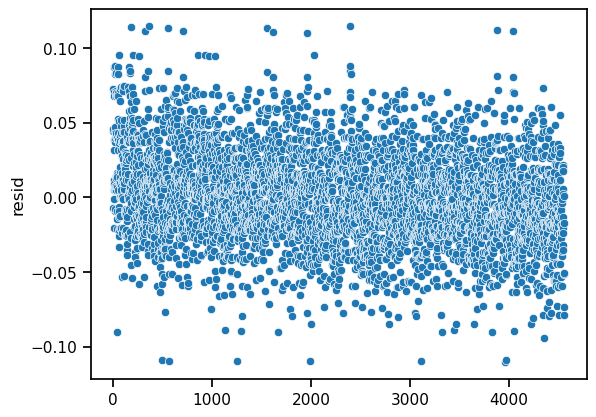

In [327]:
sns.scatterplot(x = np.arange(4560),y = t['resid'])
plt.show()

In [321]:
t.plot.scatter(x = 'pred', y = 'resid',by = 'Name')

:NdOverlay   [Name]
   :Scatter   [pred]   (resid)

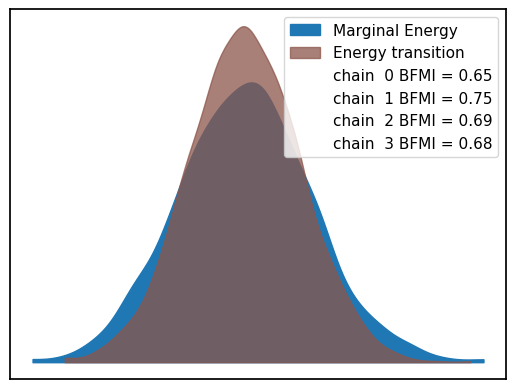

<Axes: >

In [324]:
az.plot_energy(idata,show = True)